### 1. Data reading & first glance

Challenge overview

You were tasked with creating a model that predicts the price of a house based on its characteristics.

The project will be divided into two major phases:

Create a model to predict whether a house is expensive or not.
Create a model to predict the exact price of a house.
Dataset variables

LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
TotalBsmtSF: Total square feet of basement area
BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
Fireplaces: Number of fireplaces
PoolArea: Pool area in square feet
GarageCars: Size of garage in car capacity
WoodDeckSF: Wood deck area in square feet
ScreenPorch: Screen porch area in square feet

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
#read text file into a Dataframe
df = pd.read_csv("housing-classification-iter-0-2.csv")
df.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [4]:
df.shape

(1460, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [6]:
df.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [7]:
#Check if the columns have any null values
df.isna().sum()   #LotFrontage has 259 null values

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

In [9]:
df.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,70.049958,1057.429452,2.866438,0.613014,2.758904,1.767123,94.244521,15.060959,0.148630
std,9981.264932,24.284752,438.705324,0.815778,0.644666,40.177307,0.747315,125.338794,55.757415,0.355845
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,59.000000,795.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9478.500000,69.000000,991.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,11601.500000,80.000000,1298.250000,3.000000,1.000000,0.000000,2.000000,168.000000,0.000000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000,1.000000


## Define X and y

In [10]:
X = df
y = df.pop('Expensive')

In [14]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

As you can see, the target is just a bunch of zeros and ones. 1 means the expensive and 0 not expensive

In [15]:
X

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


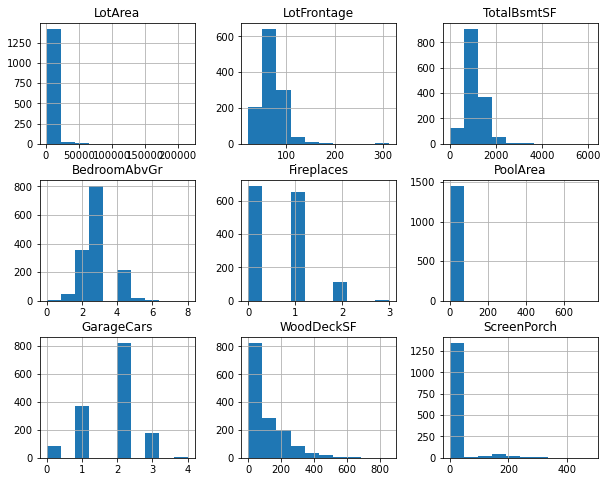

In [16]:
X.hist(figsize=(10, 8));

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function train_test_split to shuffle the observations randomly and create the train and test sets for both the X and the y objects at the same time, ensuring that they are shuffled the same way:## Data Splitting (Train - Test)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [19]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
376,8846,57.0,870,2,0,0,2,0,0
250,5350,55.0,728,3,0,0,0,263,0
228,8521,70.0,912,3,1,0,1,0,0
40,8658,84.0,1088,3,1,0,2,0,0
428,6762,64.0,1208,2,0,0,2,105,0


In [20]:
y_train.head()


376    0
250    0
228    0
40     0
428    0
Name: Expensive, dtype: int64

As you can see from the indeces, both the X and y train sets contain first the passenger in position 772, then the one in position 157, etc.

The same applies for the test set:

In [23]:
X_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
147,9505,NaN,884,3,1,0,2,144,0
676,9600,60.0,1095,4,0,0,3,0,0
1304,3363,32.0,976,3,0,0,2,0,0
1372,9750,75.0,1108,3,1,0,2,253,0
1427,10930,60.0,913,3,1,0,1,0,0


In [25]:
y_test

147     0
676     0
1304    0
1372    1
1427    0
       ..
908     0
1096    0
637     0
753     1
554     1
Name: Expensive, Length: 438, dtype: int64

## Dealing with missing Data

#### We will use the SimpleImputer() with its default values. It will replace any missing value with the mean of the column it belongs to.

In [27]:
# impute NaN's to train set
#import
from sklearn.impute import SimpleImputer

# initialize
my_imputer = SimpleImputer()

# fit
my_imputer.fit(X_train)

# transform train 
X_imputed_train = my_imputer.transform(X_train)

### Implement a Decision Tree (missing values imputed)

In [28]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_imputed_train, y=y_train)

DecisionTreeClassifier()

## Make predictions and check accuracy on the train set

In [29]:
# make predictions
y_pred_tree_train = my_tree.predict(X_imputed_train)

In [30]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )      #train_accuracy_score is 1.0

1.0

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

## Check accuracy for the test set
#### Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

## Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [68]:
# impute NaN's to test set
X_imputed_test = my_imputer.transform(X_test)

### Make predictions on the test set

In [69]:
y_pred_tree_test = my_tree.predict(X_imputed_test)

### Check accuracy score on the test set

In [70]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )    #test_accuracy_score = 0.873

0.8584474885844748

Our model has a very high variance: the difference between train and test set is huge. We can also say that our model suffers from overfitting: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

# Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

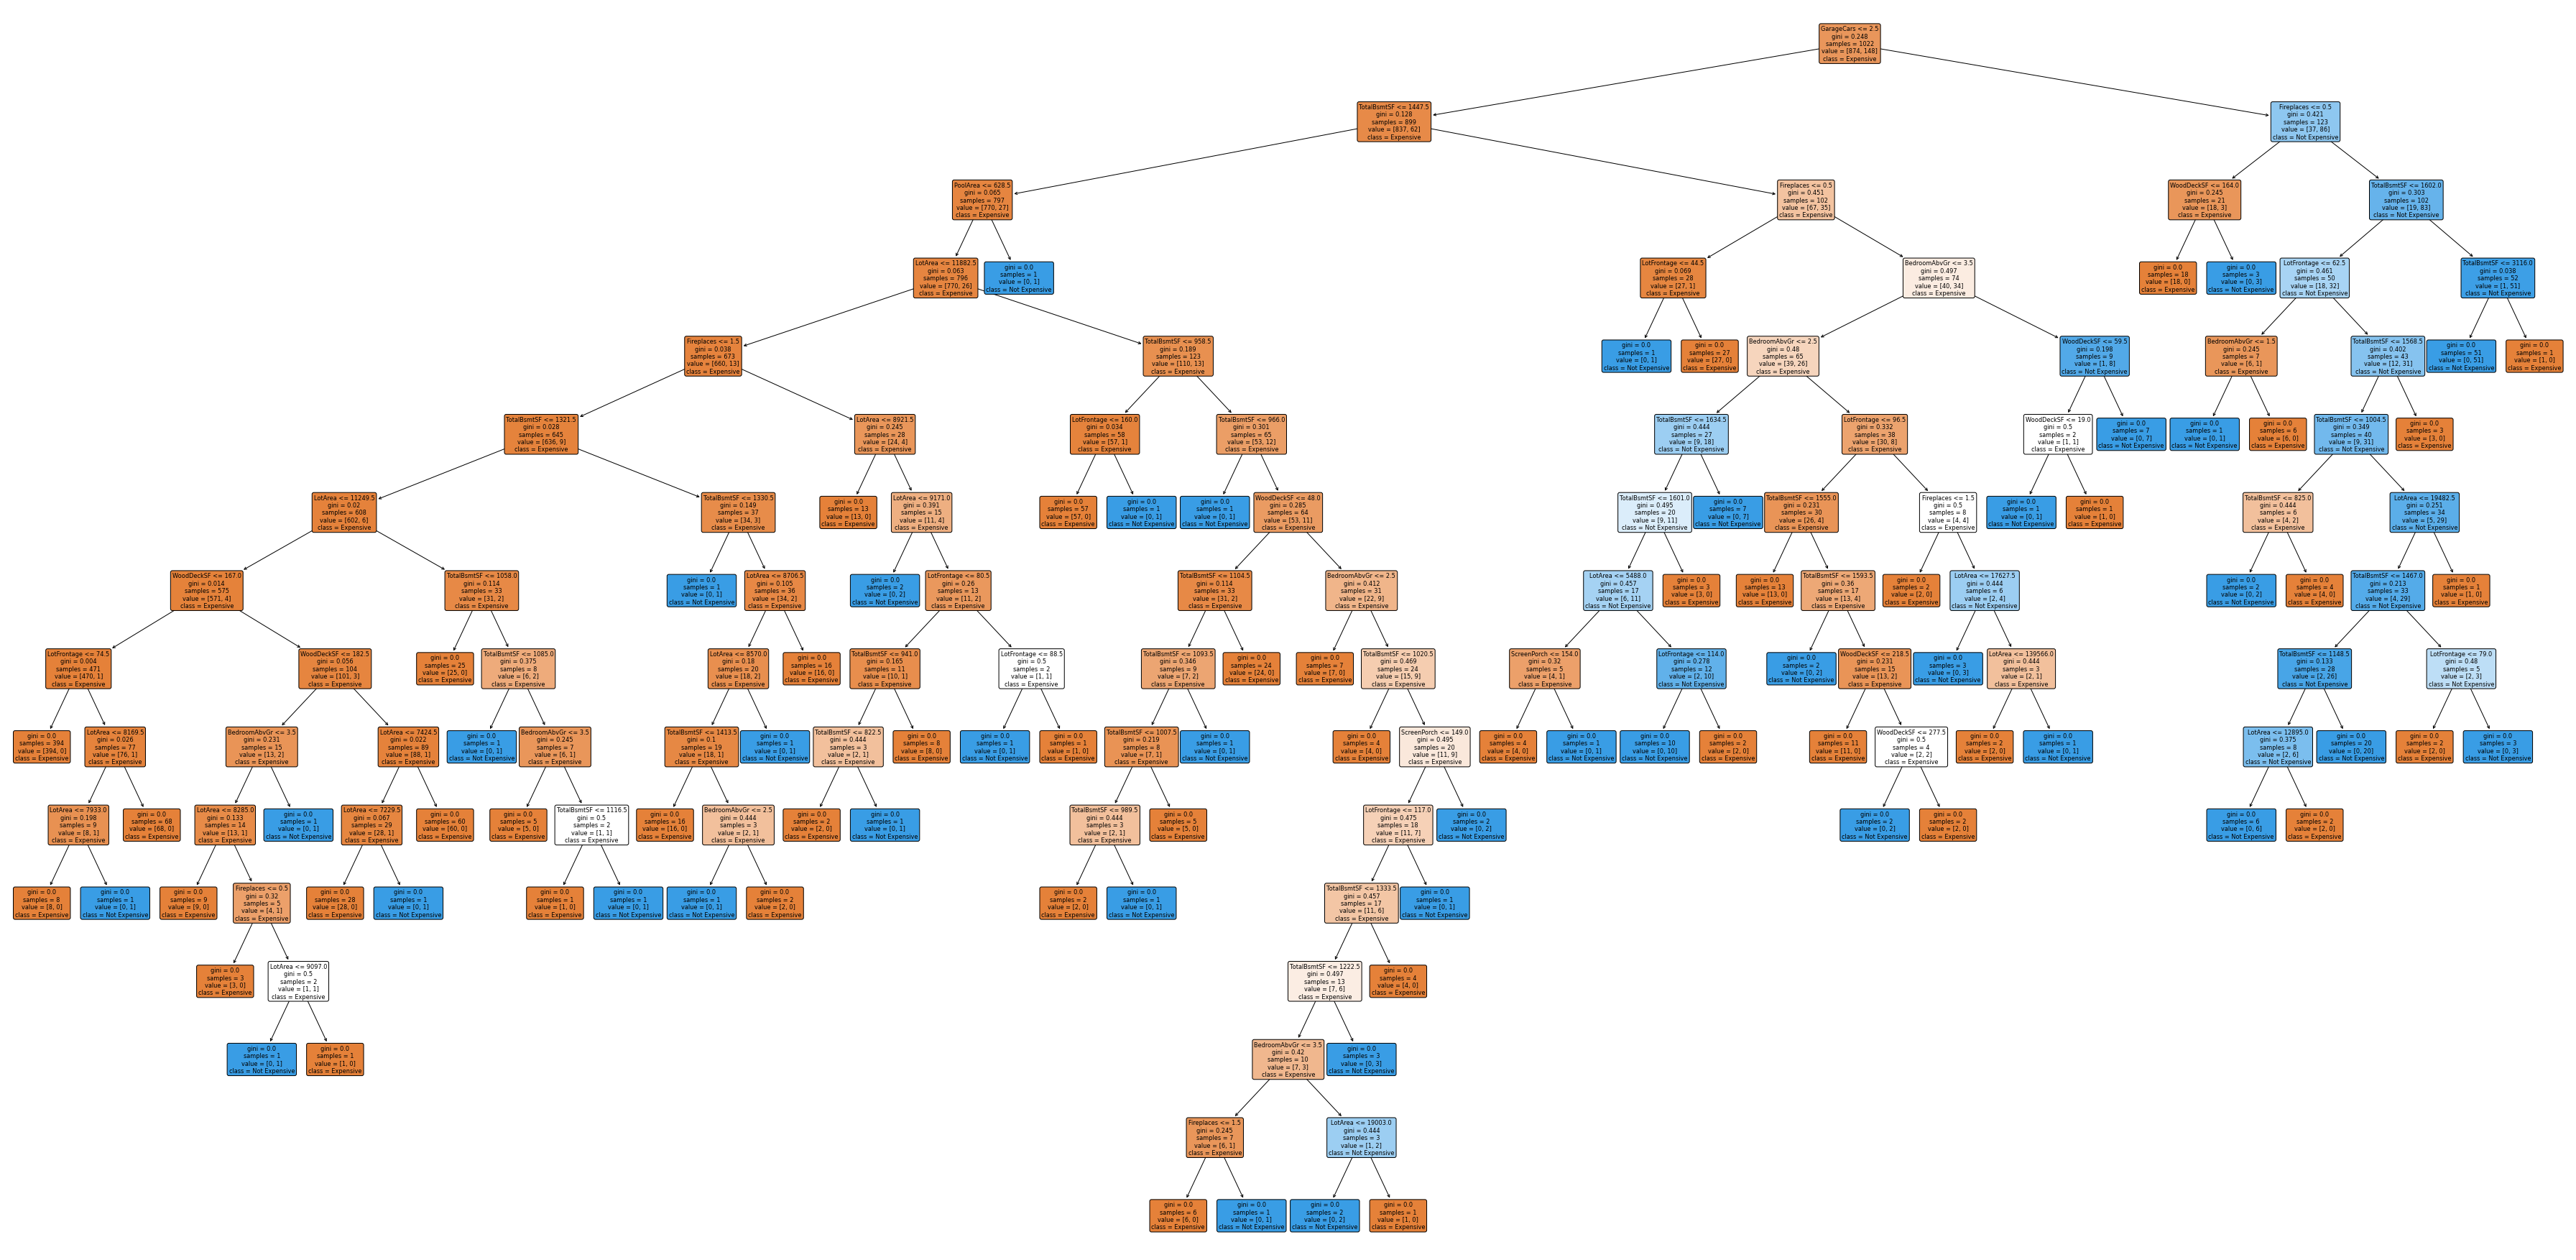

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Expensive','Not Expensive'], 
     feature_names=X.columns
     );

Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is very complex, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

### Pruning the Tree

Tweak the parameters max_depth and min_samples_leaf of the decision tree, based on the Scikit-Learn documentation.
Try to make the tree smaller.
Visualize again the tree.
Check the performance of your "small tree" on the train & test sets.## Pruning the tree

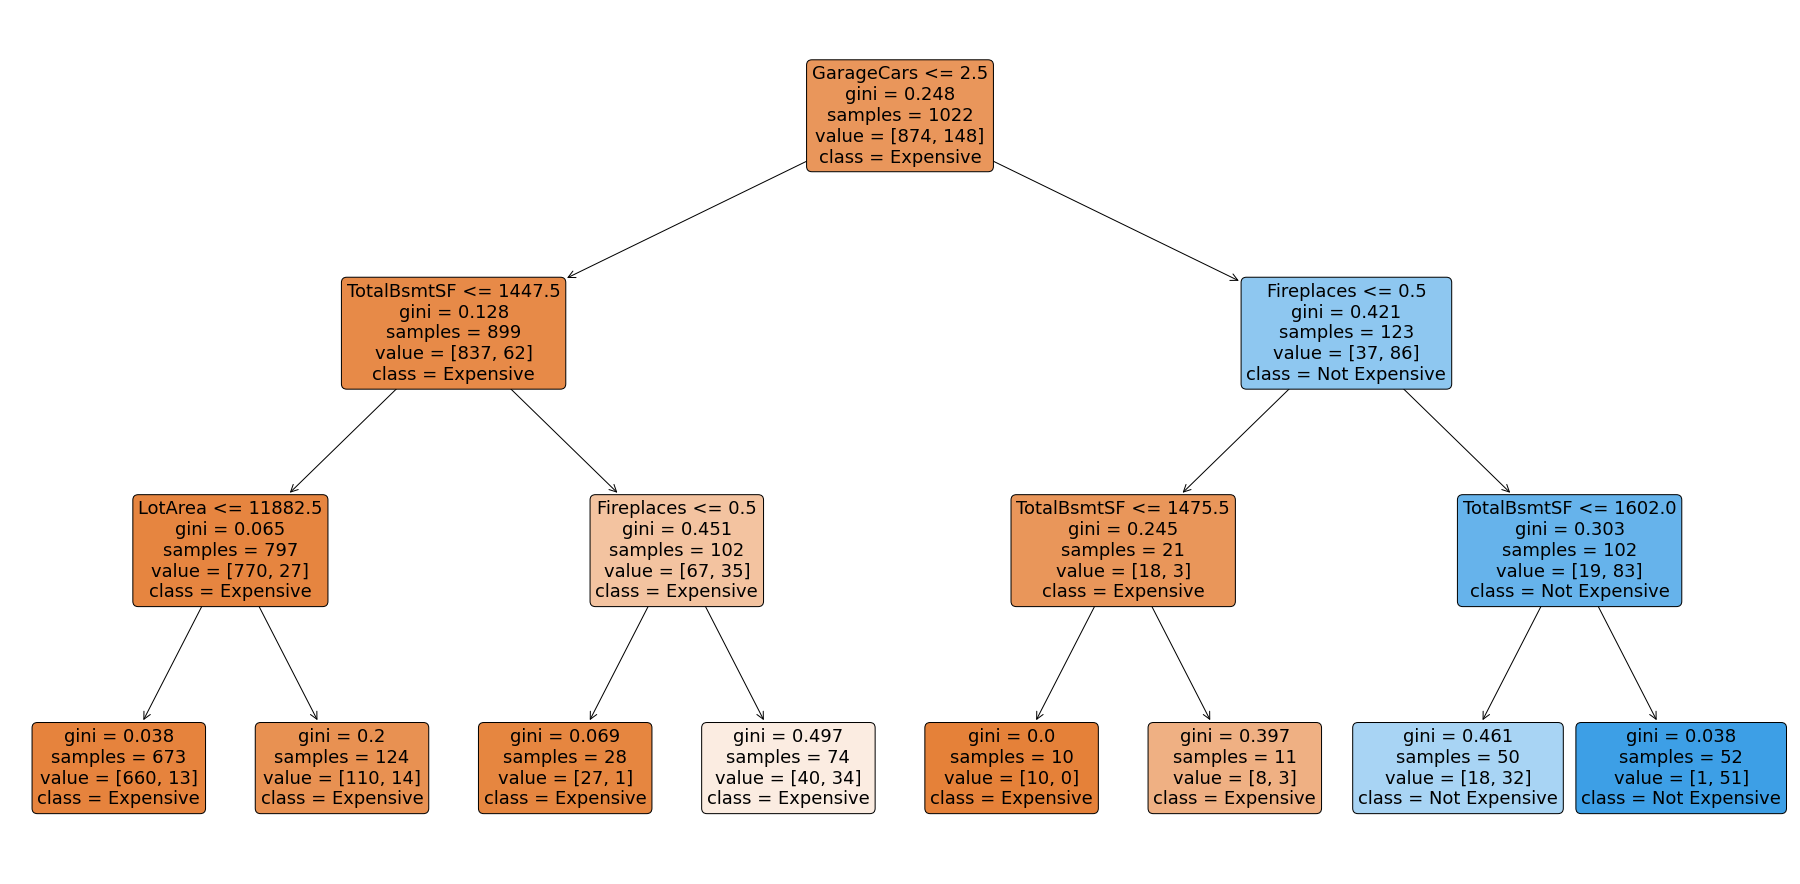

In [35]:
my_tree = DecisionTreeClassifier(max_depth=3,
                                 min_samples_leaf=10
                                )


my_tree.fit(X = X_imputed_train, 
            y = y_train)

plt.figure(figsize=(32, 16))
plot_tree(
    my_tree,
    filled=True, 
    rounded=True, 
    class_names=['Expensive','Not Expensive'], 
    feature_names=X_train.columns
    );